In [1]:
#Implement a Support Vector Machine (SVM) to classify dogs and cats images
!pip install opencv-python

In [1]:
#importing modules
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
import os
import numpy as np
import cv2

data_dir = r"c:\imagedect\PetImages"
categories = ["Cat", "Dog"]

X = []
y = []

IMG_SIZE = 64
max_images_per_class = 1000  # Limit to 1000 per category

for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)

    count = 0
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img.flatten())
            y.append(label)
            count += 1
            if count >= max_images_per_class:
                break  # Stop after 1000 images
        except Exception:
            continue

X = np.array(X)
y = np.array(y)

print(f"Total images loaded: {len(X)}")


Total images loaded: 2000


In [3]:
from sklearn.model_selection import train_test_split

# Split the smaller dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))



Training samples: 1600
Testing samples: 400


In [4]:
from sklearn.svm import SVC

# Train the SVM model on the reduced dataset
model = SVC(kernel='linear')  # You can try 'rbf' later too
model.fit(X_train, y_train)

print(" Model training complete.")


 Model training complete.


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


Accuracy: 53.00%

Classification Report:
              precision    recall  f1-score   support

         Cat       0.52      0.58      0.55       199
         Dog       0.54      0.48      0.51       201

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



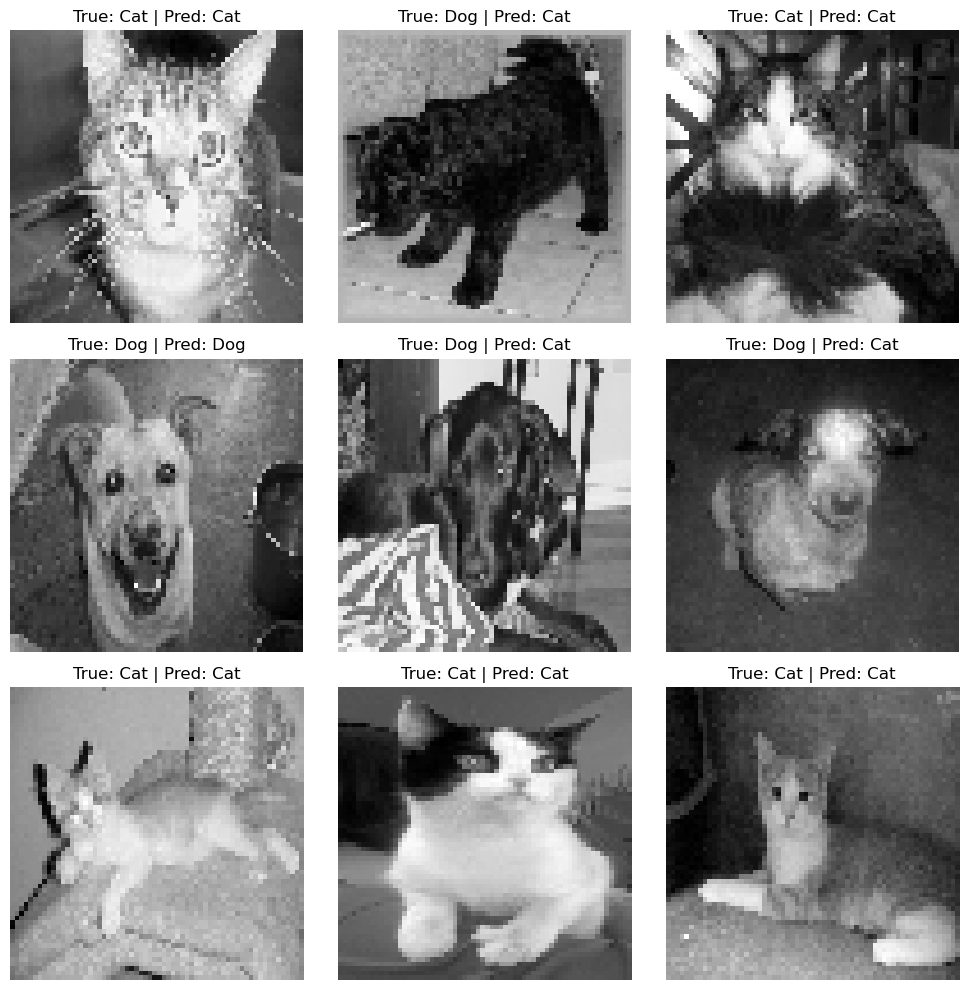

In [6]:
import matplotlib.pyplot as plt

# Map labels back to names
label_map = {0: "Cat", 1: "Dog"}

# Plot 9 sample predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    index = np.random.randint(0, len(X_test))
    image = X_test[index].reshape(64, 64)
    true_label = label_map[y_test[index]]
    pred_label = label_map[y_pred[index]]

    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"True: {true_label} | Pred: {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()
